# PHÂN KHÚC KHÁCH HÀNG TRUNG TÂM THƯƠNG MẠI

**Nhóm sinh viên:**
- Sinh viên 1: [Nguyễn Trí Sự] - MSSV: [3123580041]
- Sinh viên 2: [Lê Thành Danh] - MSSV: [3123580005]
- Sinh viên 3: [Huỳnh Nhật Thành] - MSSV: [3123580044]
- Sinh viên 4: [Nguyễn Quốc Thuận] - MSSV: [3123580048]

**Giảng viên hướng dẫn:** [Đỗ Như Tài]

**Lớp:** [DDU1231]

---

## MỤC LỤC

1. [CHƯƠNG 1: GIỚI THIỆU](#chuong1)
2. [CHƯƠNG 2: TỔNG QUAN DỮ LIỆU](#chuong2)
3. [CHƯƠNG 3: TIỀN XỬ LÝ](#chuong3)
4. [CHƯƠNG 4: XÂY DỰNG MÔ HÌNH](#chuong4)
5. [CHƯƠNG 5: KẾT QUẢ VÀ INSIGHTS](#chuong5)
6. [CHƯƠNG 6: KẾT LUẬN](#chuong6)

---

# <a id='chuong1'></a>CHƯƠNG 1: GIỚI THIỆU

## 1.1. Tổng quan đề tài

### Bối cảnh
Trong thời đại thương mại điện tử phát triển mạnh, các trung tâm thương mại cần hiểu rõ khách hàng để:
- **Cá nhân hóa dịch vụ** cho từng nhóm khách hàng
- **Tối ưu chi phí marketing** bằng cách nhắm đúng đối tượng
- **Tăng doanh thu** thông qua chiến lược phù hợp

### Mục tiêu nghiên cứu
1. Phân loại khách hàng thành các nhóm có đặc điểm tương đồng
2. Áp dụng 3 thuật toán: **K-Means**, **Hierarchical**, **DBSCAN**
3. So sánh hiệu quả các thuật toán
4. Đưa ra insights và chiến lược marketing

### Câu hỏi nghiên cứu
1. Có bao nhiêu nhóm khách hàng phù hợp?
2. Đặc điểm của từng nhóm là gì?
3. Nhóm nào là khách hàng VIP?
4. Thuật toán nào cho kết quả tốt nhất?

## 1.2. Quy trình khai phá dữ liệu (KDD)
Bài toán phân khúc khách hàng trong nghiên cứu này được thực hiện theo
quy trình Khai phá dữ liệu (Knowledge Discovery in Databases – KDD), gồm
các bước: lựa chọn dữ liệu (Selection), tiền xử lý (Preprocessing),
chuyển đổi dữ liệu (Transformation), khai phá dữ liệu (Data Mining) và
diễn giải tri thức (Interpretation).

Trong đó, trọng tâm của đề tài tập trung vào bước Khai phá dữ liệu,
thông qua việc áp dụng và so sánh các thuật toán phân cụm như K-Means,
Hierarchical Clustering và DBSCAN nhằm phát hiện các nhóm khách hàng có
đặc điểm tương đồng và rút ra tri thức phục vụ cho chiến lược kinh doanh.

---

## Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Settings
import warnings
warnings.filterwarnings('ignore')

# Plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Import thư viện thành công!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Import thư viện thành công!
Pandas version: 2.2.3
NumPy version: 2.1.3


---
# <a id='chuong2'></a>CHƯƠNG 2: TỔNG QUAN DỮ LIỆU

## 2.1. Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')

print("="*60)
print("THÔNG TIN DATASET")
print("="*60)
print(f"Kích thước: {df.shape[0]} dòng × {df.shape[1]} cột")
print(f"\nDanh sách cột:\n{df.columns.tolist()}")

THÔNG TIN DATASET
Kích thước: 200 dòng × 5 cột

Danh sách cột:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


## 2.2. Khám phá dữ liệu ban đầu

In [3]:
# 5 dòng đầu tiên
print("\n5 DÒNG ĐẦU TIÊN:")
display(df.head())


5 DÒNG ĐẦU TIÊN:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Thông tin dataset
print("\nTHÔNG TIN CÁC CỘT:")
df.info()


THÔNG TIN CÁC CỘT:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Kiểm tra chất lượng dữ liệu
print("\nKIỂM TRA CHẤT LƯỢNG:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")
print("\nDữ liệu SẠCH!")


KIỂM TRA CHẤT LƯỢNG:
Missing values: 0
Duplicates: 0

Dữ liệu SẠCH!


## 2.3. Thống kê mô tả

In [6]:
# Thống kê các biến số
print("\nTHỐNG KÊ MÔ TẢ:")
display(df.describe().round(2))


THỐNG KÊ MÔ TẢ:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [7]:
# Phân bố Gender
print("\nPHÂN BỐ GIỚI TÍNH:")
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print(f"\nTỷ lệ: Female {gender_counts['Female']/len(df)*100:.1f}% - Male {gender_counts['Male']/len(df)*100:.1f}%")


PHÂN BỐ GIỚI TÍNH:
Gender
Female    112
Male       88
Name: count, dtype: int64

Tỷ lệ: Female 56.0% - Male 44.0%


## 2.4. Exploratory Data Analysis (EDA)

### 2.4.1. Phân phối các biến số

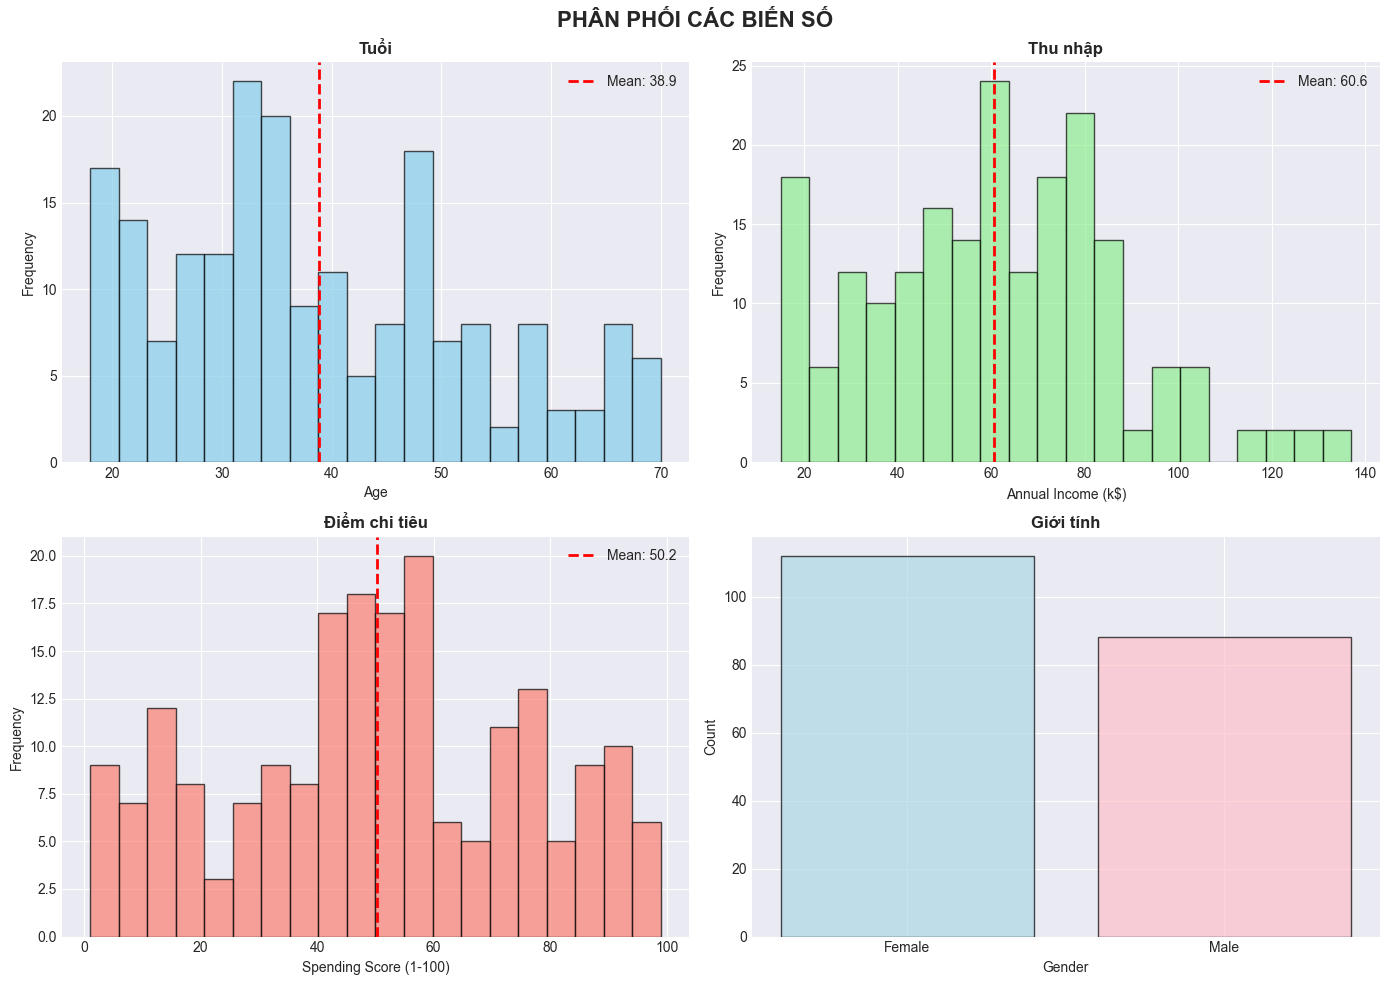

In [8]:
# Histogram - Phân phối các biến
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('PHÂN PHỐI CÁC BIẾN SỐ', fontsize=16, fontweight='bold')

# Age
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Tuổi', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
axes[0, 0].legend()

# Annual Income
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Thu nhập', fontweight='bold')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Annual Income (k$)"].mean():.1f}')
axes[0, 1].legend()

# Spending Score
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Điểm chi tiêu', fontweight='bold')
axes[1, 0].set_xlabel('Spending Score (1-100)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
axes[1, 0].legend()

# Gender
gender_counts = df['Gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['lightblue', 'pink'], edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Giới tính', fontweight='bold')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('01_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.4.2. Correlation Heatmap

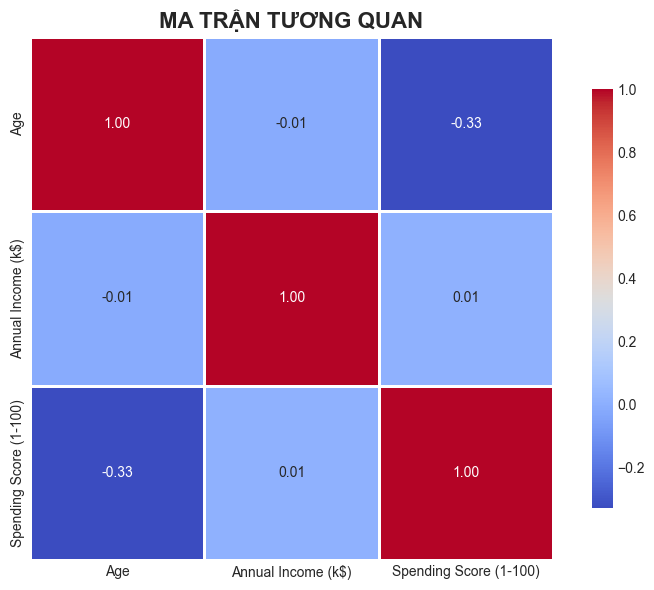


Ma trận tương quan:
                         Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.00               -0.01                   -0.33
Annual Income (k$)     -0.01                1.00                    0.01
Spending Score (1-100) -0.33                0.01                    1.00


In [9]:
# Ma trận tương quan
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title('MA TRẬN TƯƠNG QUAN', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('02_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMa trận tương quan:")
print(correlation_matrix.round(2))

**Insight quan trọng:**
- Income vs Spending Score: Gần như không tương quan (0.01)
- **Thu nhập cao ≠ Chi tiêu nhiều!**

---
# <a id='chuong3'></a>CHƯƠNG 3: TIỀN XỬ LÝ DỮ LIỆU

## 3.1. Feature Engineering

In [10]:
# Encoding Gender
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])
print("Encoding Gender: Male=1, Female=0")

Encoding Gender: Male=1, Female=0


## 3.2. Chuẩn hóa dữ liệu

In [11]:
# Chọn features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Đã chuẩn hóa {X.shape[0]} mẫu, {X.shape[1]} features")
print(f"Mean: {X_scaled.mean(axis=0).round(10)}")
print(f"Std: {X_scaled.std(axis=0).round(2)}")

Đã chuẩn hóa 200 mẫu, 3 features
Mean: [-0. -0. -0.]
Std: [1. 1. 1.]


---
# <a id='chuong4'></a>CHƯƠNG 4: XÂY DỰNG MÔ HÌNH

## 4.1. K-Means Clustering

### 4.1.1. Elbow Method

In [12]:
# Tính WCSS và Silhouette Score
wcss = []
silhouette_scores = []
K_range = range(2, 11)

print("Tính toán cho K từ 2-10...\n")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil)
    print(f"K={k}: WCSS={kmeans.inertia_:>8.2f} | Silhouette={sil:.4f}")

print("\nHoàn thành!")

Tính toán cho K từ 2-10...

K=2: WCSS=  389.39 | Silhouette=0.3355
K=3: WCSS=  295.21 | Silhouette=0.3578
K=4: WCSS=  205.23 | Silhouette=0.4040
K=5: WCSS=  168.25 | Silhouette=0.4166
K=6: WCSS=  133.87 | Silhouette=0.4284
K=7: WCSS=  117.01 | Silhouette=0.4172
K=8: WCSS=  103.87 | Silhouette=0.4082
K=9: WCSS=   93.09 | Silhouette=0.4177
K=10: WCSS=   82.39 | Silhouette=0.4066

Hoàn thành!


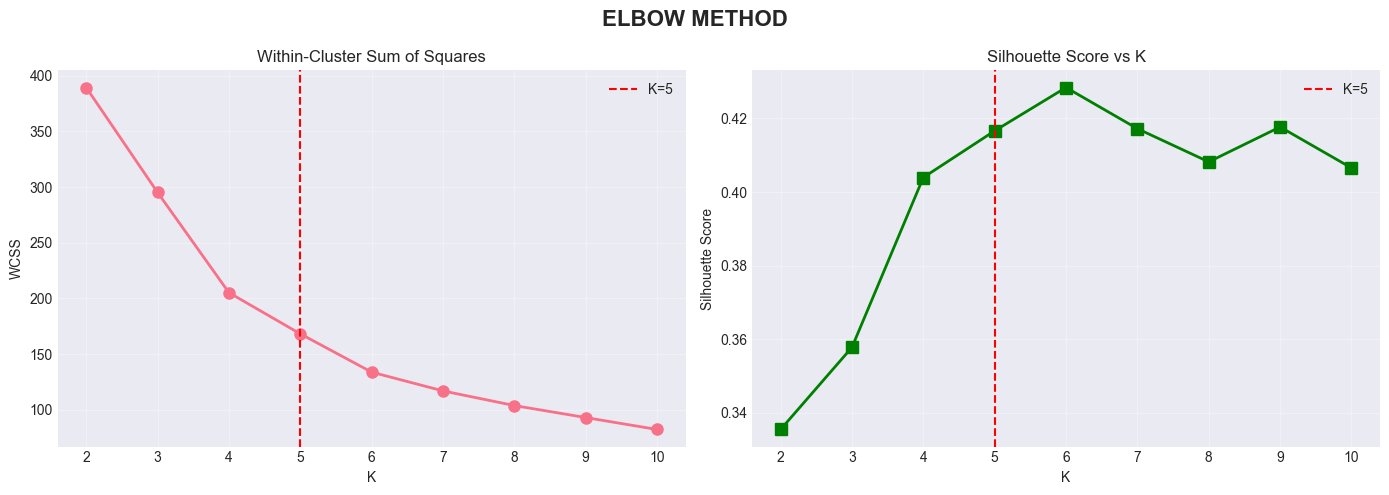

K tối ưu = 5


In [13]:
# Vẽ Elbow Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('ELBOW METHOD', fontsize=16, fontweight='bold')

# WCSS
axes[0].plot(K_range, wcss, marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('K')
axes[0].set_ylabel('WCSS')
axes[0].set_title('Within-Cluster Sum of Squares')
axes[0].axvline(x=5, color='red', linestyle='--', label='K=5')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silhouette
axes[1].plot(K_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs K')
axes[1].axvline(x=5, color='red', linestyle='--', label='K=5')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('03_elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

print("K tối ưu = 5")

### 4.1.2. Huấn luyện K-Means với K=5

In [14]:
# Huấn luyện K-Means
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = y_kmeans

# Đánh giá
sil_kmeans = silhouette_score(X_scaled, y_kmeans)
print(f"K-Means với K={optimal_k}")
print(f"Silhouette Score: {sil_kmeans:.3f}")
print(f"\nPhân bố clusters:")
print(df['KMeans_Cluster'].value_counts().sort_index())

K-Means với K=5
Silhouette Score: 0.417

Phân bố clusters:
KMeans_Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64


In [15]:
# Phân tích đặc điểm từng cluster
print("\nĐẶC ĐIỂM TỪNG CLUSTER:")
cluster_analysis = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(cluster_analysis.round(2))


ĐẶC ĐIỂM TỪNG CLUSTER:


,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,
0,46.25,26.75,18.35
1,25.19,41.09,62.24
2,32.88,86.10,81.53
3,39.87,86.10,19.36
4,55.64,54.38,48.85


### 4.1.3. Visualization K-Means 2D

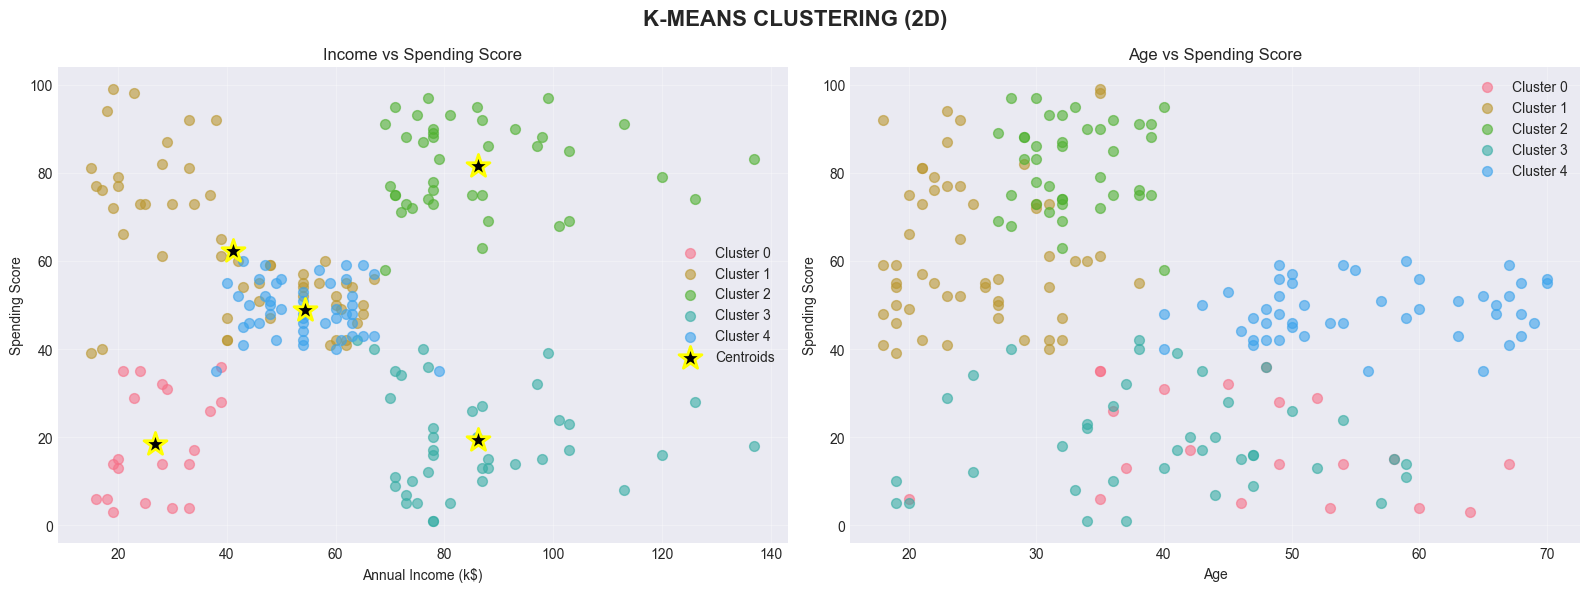

In [16]:
# K-Means 2D
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('K-MEANS CLUSTERING (2D)', fontsize=16, fontweight='bold')

# Income vs Spending
for i in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == i]
    axes[0].scatter(cluster_data['Annual Income (k$)'], 
                   cluster_data['Spending Score (1-100)'],
                   label=f'Cluster {i}', s=50, alpha=0.6)

axes[0].scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
               scaler.inverse_transform(kmeans.cluster_centers_)[:, 2],
               s=300, c='black', marker='*', label='Centroids', edgecolors='yellow', linewidths=2)
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score')
axes[0].set_title('Income vs Spending Score')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Age vs Spending
for i in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == i]
    axes[1].scatter(cluster_data['Age'], 
                   cluster_data['Spending Score (1-100)'],
                   label=f'Cluster {i}', s=50, alpha=0.6)

axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score')
axes[1].set_title('Age vs Spending Score')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('04_kmeans_2d.png', dpi=300, bbox_inches='tight')
plt.show()